### **Loading Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Loading and Sampling the Dataset**

In [8]:
df1 = pd.read_csv('/content/drive/MyDrive/netflix.csv')
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Understanding the data, the structure.

In [3]:
df1.shape

(8807, 12)

The Dataset has 8807 rows and 12 columns

In [9]:
df1.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


The release_year column only has numerical data, So the rest are categorical data.

In [10]:
df1['date_added'] = pd.to_datetime(df1['date_added'].str.strip(), format='%B %d, %Y', errors='coerce')

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


 information about the whole data, null values and datatype of the coolumns and changed the Datatypr of the field 'Date Added' to DateTime.


In [11]:
df1.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


Many nulls in directors, cast and country columns.

In [12]:
df1.nunique()

,0
show_id,8807
type,2
title,8807
director,4528
cast,7692
country,748
date_added,1714
release_year,74
rating,17
duration,220


These are total features of the dataset. It is seen that show_id and the title column has all unique values i.e. total 8807 which equates with total rows in the dataset. Hence It can be concluded that ,

Total 8807 movies/TV shows data is provided in the dataset.

### **Observating the shape of data, data types of all the attributes, missing value detection, statistical summary**

In [13]:
df1.describe(include = object)

,show_id,type,title,director,cast,country,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,3207,1793,362,4


**Data Cleanup and Modification**

In [14]:
df1[df1['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [15]:
df1[df1['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,2017-01-26,2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,2016-12-01,2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,2018-02-01,2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,2017-03-01,2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


We can see there are 4 rows with missing rating column values and 3 rows have the duration misplaced in the rating column.

In [16]:
rt_idx = df1[df1['duration'].isna()].index
df1.loc[rt_idx] = df1.loc[rt_idx].fillna(method = 'ffill' , axis = 1)

<ipython-input-16-446607691486>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1.loc[rt_idx] = df1.loc[rt_idx].fillna(method = 'ffill' , axis = 1)
<ipython-input-16-446607691486>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2017 2010 2015]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df1.loc[rt_idx] = df1.loc[rt_idx].fillna(method = 'ffill' , axis = 1)


In [17]:
df1.loc[rt_idx ,'rating'] = 'Not Rated'

In [18]:
df1.loc[rt_idx]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,Not Rated,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,Not Rated,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,Not Rated,66 min,Movies,The comic puts his trademark hilarious/thought...


replaced the wrong entries in the rating column

In [19]:
df1[df1.rating.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,2017-01-26,2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,2016-12-01,2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,2018-02-01,2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,2017-03-01,2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [20]:
rt_idx2 = df1[df1.rating.isna()].index
rt_idx2

Index([5989, 6827, 7312, 7537], dtype='int64')

In [21]:
df1.loc[rt_idx2 , 'rating'] = 'Not Rated'
df1.loc[rt_idx2]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,2017-01-26,2017,Not Rated,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,2016-12-01,2013,Not Rated,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,2018-02-01,2015,Not Rated,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,2017-03-01,2015,Not Rated,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [22]:
df1[df1.rating == 'Not Rated']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,Not Rated,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,Not Rated,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,Not Rated,66 min,Movies,The comic puts his trademark hilarious/thought...
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,2017-01-26,2017,Not Rated,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,2016-12-01,2013,Not Rated,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,2018-02-01,2015,Not Rated,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,2017-03-01,2015,Not Rated,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


Rows with missing values in Rating column replaced with placeholder value.

In [23]:
df1.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'Not Rated', 'NR', 'TV-Y7-FV', 'UR'],
      dtype=object)

*  In rating column , NR (Not rated) is present as NR. lets change 'Not Rated'
 to NR.
*   So now duration and rating columns are free from nulls.

In [24]:
df1.loc[df1['rating'] == 'Not Rated' , 'rating'] = 'NR'
df1.rating.value_counts()

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


In [25]:
rt_idx3 = df1[df1.date_added.isna()].index
df1.loc[rt_idx3]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [26]:
df1.drop(df1.loc[df1['date_added'].isna()].index , axis = 0 , inplace = True)

Dropping the null values from Date_added Column.

In [27]:
df1['date_added'].value_counts()

,count
date_added,
2020-01-01,110
2019-11-01,91
2018-03-01,75
2019-12-31,74
2018-10-01,71
...,...
2017-02-21,1
2017-02-07,1
2017-01-29,1


In [29]:
df1['year_added'] = df1['date_added'].dt.year
df1['month_added'] = df1['date_added'].dt.month
df1[['date_added' , 'year_added' , 'month_added']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, 0 to 8806
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date_added   8797 non-null   datetime64[ns]
 1   year_added   8797 non-null   int32         
 2   month_added  8797 non-null   int32         
dtypes: datetime64[ns](1), int32(2)
memory usage: 206.2 KB


Creating year and month separate column from Date_added for easy bifercation.

In [30]:
round((df1.isna().sum()/ df1.shape[0])*100)

,0
show_id,0.0
type,0.0
title,0.0
director,30.0
cast,9.0
country,9.0
date_added,0.0
release_year,0.0
rating,0.0
duration,0.0


30% of values for the director column is missing and for cast and country 9% in each field.

In [33]:
df1['country']

,country
0,United States
1,South Africa
2,NaN
3,NaN
4,India
...,...
8802,United States
8803,NaN
8804,United States
8805,United States


In [35]:
df1.country.value_counts()

,count
country,
United States,2812
India,972
United Kingdom,418
Japan,244
South Korea,199
...,...
"Romania, Bulgaria, Hungary",1
"Uruguay, Guatemala",1
"France, Senegal, Belgium",1


In [45]:
df2 = df1.assign(country=df1.country.str.split(', ')).explode('country')
df2.shape

(10835, 14)

In [46]:
df2.country.value_counts()

,count
country,
United States,3683
India,1046
United Kingdom,803
Canada,445
France,393
...,...
Bermuda,1
Ecuador,1
Armenia,1


In [47]:
df2['country'].nunique()

127

In [221]:
df2.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
count,10835,10835,10835,7875,9831,10005,10835,10835.0,10835,10835,10835,10835,10835.000000,10835.000000
unique,8797,2,8797,4528,7682,127,NaN,74.0,14,220,513,8765,NaN,NaN
top,s6234,Movie,Barbecue,Rajiv Chilaka,David Attenborough,United States,NaN,2018.0,TV-MA,1 Season,"Dramas, International Movies",A blend of cultural nuance and mesmerizing tec...,NaN,NaN
freq,12,7814,12,19,44,3683,NaN,1389.0,3749,1985,485,12,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-10 16:50:03.599446272,NaN,NaN,NaN,NaN,NaN,2018.856853,6.624181
min,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,2008.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2018-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,2018.000000,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,2019.000000,7.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-19 12:00:00,NaN,NaN,NaN,NaN,NaN,2020.000000,10.000000
max,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-25 00:00:00,NaN,NaN,NaN,NaN,NaN,2021.000000,12.000000


# **Non-Graphical Analysis: Value counts and unique attributes**

In [52]:
df1['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

2 'type' of content is present in the Dataset, 'Movie', 'TV Show':

In [53]:
movies  = df1.loc[df1['type'] == 'Movie']
tv_shows = df1.loc[df1['type'] == 'TV Show']

In [54]:
movies.duration.value_counts()

,count
duration,
90 min,152
94 min,146
97 min,146
93 min,146
91 min,144
...,...
208 min,1
5 min,1
16 min,1


In [57]:
tv_shows.duration.value_counts()

,count
duration,
1 Season,1793
2 Seasons,421
3 Seasons,198
4 Seasons,94
5 Seasons,64
6 Seasons,33
7 Seasons,23
8 Seasons,17
9 Seasons,9


As movies and TV shows both have different format for duration, let's change duration for movies as minutes & TV shows as seasons.

In [58]:
#Movies
movies['duration'] = movies['duration'].str[:-3]
movies['duration'] = movies['duration'].astype('float')
movies.rename({'duration': 'duration_in_minutes'} ,axis = 1 , inplace = True)

#Tv-Shows
tv_shows['duration'] = tv_shows.duration.str[:-7].apply(lambda x : x.strip())
tv_shows['duration'] = tv_shows['duration'].astype('float')
tv_shows.rename({'duration': 'duration_in_seasons'} ,axis = 1 , inplace = True)

<ipython-input-58-de571af18c8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = movies['duration'].str[:-3]
<ipython-input-58-de571af18c8e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = movies['duration'].astype('float')
<ipython-input-58-de571af18c8e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [59]:
tv_shows.duration_in_seasons

,duration_in_seasons
1,2.0
2,1.0
3,1.0
4,2.0
5,1.0
...,...
8795,2.0
8796,2.0
8797,3.0
8800,1.0


In [67]:
movies.duration_in_minutes

,duration_in_minutes
0,90.0
6,91.0
7,125.0
9,104.0
12,127.0
...,...
8801,96.0
8802,158.0
8804,88.0
8805,88.0


The Earliest added movie and tv shows with their name in the Dataset.

In [64]:
earliest_movie = movies.loc[movies.date_added.idxmin()]
latest_movie = movies.loc[movies.date_added.idxmax()]

earliest_tv_show = tv_shows.loc[tv_shows.date_added.idxmin()]
latest_tv_show = tv_shows.loc[tv_shows.date_added.idxmax()]

print("Earliest Movie Added:")
print(earliest_movie[['title', 'date_added']])
print("\nLatest Movie Added:")
print(latest_movie[['title', 'date_added']])

print("\nEarliest TV Show Added:")
print(earliest_tv_show[['title', 'date_added']])
print("\nLatest TV Show Added:")
print(latest_tv_show[['title', 'date_added']])


Earliest Movie Added:
title         To and From New York
date_added     2008-01-01 00:00:00
Name: 5957, dtype: object

Latest Movie Added:
title         Dick Johnson Is Dead
date_added     2021-09-25 00:00:00
Name: 0, dtype: object

Earliest TV Show Added:
title             Dinner for Five
date_added    2008-02-04 00:00:00
Name: 6611, dtype: object

Latest TV Show Added:
title               Blood & Water
date_added    2021-09-24 00:00:00
Name: 1, dtype: object


In [69]:
df1.release_year.min() , df1.release_year.max()

(1925, 2021)

The Contents/shows added in this dataset ranges between 1925 and 2021

In [70]:
df1.groupby(['type' , 'rating'])['show_id'].count()

type     rating  
Movie    G             41
         NC-17          3
         NR            80
         PG           287
         PG-13        490
         R            797
         TV-14       1427
         TV-G         126
         TV-MA       2062
         TV-PG        540
         TV-Y         131
         TV-Y7        139
         TV-Y7-FV       5
         UR             3
TV Show  NR             6
         R              2
         TV-14        730
         TV-G          94
         TV-MA       1143
         TV-PG        321
         TV-Y         175
         TV-Y7        194
         TV-Y7-FV       1
Name: show_id, dtype: int64

the number of content released in each type in Netflix bifercation on Ratings.

# **Pre-processing Country Data.**

In [71]:
df1['country'].value_counts()

,count
country,
United States,2812
India,972
United Kingdom,418
Japan,244
South Korea,199
...,...
"Romania, Bulgaria, Hungary",1
"Uruguay, Guatemala",1
"France, Senegal, Belgium",1


* Many movies has multiple countries as comma separated values, which leads to analyse number of movies produced by country.

* To have ease of group by country let's unnest them in a separate df.

In [72]:
cntry_df = df1[['show_id' , 'type' , 'country']]
cntry_df.dropna(inplace = True)
cntry_df['country'] = cntry_df['country'].apply(lambda x : x.split(','))
cntry_df = cntry_df.explode('country')
cntry_df

<ipython-input-72-ef16d79b7733>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cntry_df.dropna(inplace = True)
<ipython-input-72-ef16d79b7733>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cntry_df['country'] = cntry_df['country'].apply(lambda x : x.split(','))


,show_id,type,country
0,s1,Movie,United States
1,s2,TV Show,South Africa
4,s5,TV Show,India
7,s8,Movie,United States
7,s8,Movie,Ghana
...,...,...,...
8801,s8802,Movie,Jordan
8802,s8803,Movie,United States
8804,s8805,Movie,United States
8805,s8806,Movie,United States


In [75]:
cntry_df.loc[cntry_df['country'] == '']

,show_id,type,country
193,s194,TV Show,
365,s366,Movie,
1192,s1193,Movie,
2224,s2225,Movie,
4653,s4654,Movie,
5925,s5926,Movie,
7007,s7008,Movie,


In [76]:
cntry_df = cntry_df.loc[cntry_df['country'] != '']

In [ ]:
cntry_df['country'] = cntry_df['country'].str.strip()

In [83]:
cntry_df['country'].nunique()

122

 **Netflix has movies from 122 Countries.**

In [84]:
n = cntry_df.groupby(['country' , 'type'])['show_id'].count().reset_index()
n.pivot(index = ['country'] , columns = 'type' , values = 'show_id').sort_values('Movie',ascending = False)

type,Movie,TV Show
country,,
United States,2752.0,932.0
India,962.0,84.0
United Kingdom,534.0,271.0
Canada,319.0,126.0
France,303.0,90.0
...,...,...
Azerbaijan,NaN,1.0
Belarus,NaN,1.0
Cuba,NaN,1.0


Number of contents produced in each countries.

# **Pre-processing Director Data.**

In [86]:
df1['director'].value_counts()

,count
director,
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Suhas Kadav,16
Jay Karas,14
...,...
"Raymie Muzquiz, Stu Livingston",1
Joe Menendez,1
Eric Bross,1


* Many movies' has multiple Directors as comma separated values, which leads to analyse number of movies produced by a director.

* To analyse let's unnest this in a separate df.

In [87]:
dir_df = df1[['show_id' , 'type' , 'director']]
dir_df.dropna(inplace = True)
dir_df['director'] = dir_df['director'].apply(lambda x : x.split(','))
dir_df

<ipython-input-87-c2b6c9a62b83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dir_df.dropna(inplace = True)
<ipython-input-87-c2b6c9a62b83>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dir_df['director'] = dir_df['director'].apply(lambda x : x.split(','))


,show_id,type,director
0,s1,Movie,[Kirsten Johnson]
2,s3,TV Show,[Julien Leclercq]
5,s6,TV Show,[Mike Flanagan]
6,s7,Movie,"[Robert Cullen, José Luis Ucha]"
7,s8,Movie,[Haile Gerima]
...,...,...,...
8801,s8802,Movie,[Majid Al Ansari]
8802,s8803,Movie,[David Fincher]
8804,s8805,Movie,[Ruben Fleischer]
8805,s8806,Movie,[Peter Hewitt]


In [88]:
dir_df = dir_df.explode('director')
dir_df['director'] = dir_df['director'].str.strip()

In [90]:
dir_df.director.apply(lambda x : True if len(x) == 0 else False).value_counts()

,count
director,
False,6978


In [92]:
dir_df

,show_id,type,director
0,s1,Movie,Kirsten Johnson
2,s3,TV Show,Julien Leclercq
5,s6,TV Show,Mike Flanagan
6,s7,Movie,Robert Cullen
6,s7,Movie,José Luis Ucha
...,...,...,...
8801,s8802,Movie,Majid Al Ansari
8802,s8803,Movie,David Fincher
8804,s8805,Movie,Ruben Fleischer
8805,s8806,Movie,Peter Hewitt


In [94]:
dir_df['director'].nunique()

4993

**There are total 4993 directors have their Contents in this dataset.**

In [95]:
m = dir_df.groupby(['director' , 'type'])['show_id'].count().reset_index()
m.pivot(index= ['director'] , columns = 'type' , values = 'show_id').sort_values('Movie' ,ascending = False)

type,Movie,TV Show
director,,
Rajiv Chilaka,22.0,NaN
Jan Suter,21.0,NaN
Raúl Campos,19.0,NaN
Suhas Kadav,16.0,NaN
Marcus Raboy,15.0,1.0
...,...,...
Vijay S. Bhanushali,NaN,1.0
Wouter Bouvijn,NaN,1.0
YC Tom Lee,NaN,1.0


Movies/Tv_shows direceted by each director.


# **Pre-processing Genre Data.**

In [97]:
genre_df = df1[['show_id' , 'type', 'listed_in']]
genre_df['listed_in'] = genre_df['listed_in'].apply(lambda x : x.split(','))
genre_df = genre_df.explode('listed_in')
genre_df['listed_in'] = genre_df['listed_in'].str.strip()

<ipython-input-97-048e4a3d10e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_df['listed_in'] = genre_df['listed_in'].apply(lambda x : x.split(','))


In [99]:
genre_df

,show_id,type,listed_in
0,s1,Movie,Documentaries
1,s2,TV Show,International TV Shows
1,s2,TV Show,TV Dramas
1,s2,TV Show,TV Mysteries
2,s3,TV Show,Crime TV Shows
...,...,...,...
8805,s8806,Movie,Children & Family Movies
8805,s8806,Movie,Comedies
8806,s8807,Movie,Dramas
8806,s8807,Movie,International Movies


In [101]:
genre_df.listed_in.nunique()

42

In [100]:
genre_df.listed_in.unique()

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

**available contents which fall in this 42 genres are Listed above.**

In [103]:
df1.merge(genre_df , on = 'show_id' ).groupby(['type_y'])['listed_in_y'].nunique()

,listed_in_y
type_y,
Movie,20
TV Show,22


Movies of 20 genres and Tv_shows of 22 genres are listed in the dataset.

In [105]:
c= genre_df.groupby(['listed_in' , 'type'])['show_id'].count().reset_index()
c.pivot(index = 'listed_in' , columns = 'type' , values = 'show_id').sort_index()

type,Movie,TV Show
listed_in,,
Action & Adventure,859.0,NaN
Anime Features,71.0,NaN
Anime Series,NaN,175.0
British TV Shows,NaN,252.0
Children & Family Movies,641.0,NaN
Classic & Cult TV,NaN,26.0
Classic Movies,116.0,NaN
Comedies,1674.0,NaN
Crime TV Shows,NaN,469.0


**Total Movies/Tv Shows in each genre.**

# **Pre-processing Actor Data.**

In [106]:
cast_df = df1[['show_id' , 'type' ,'cast']]
cast_df.dropna(inplace = True)
cast_df['cast'] = cast_df['cast'].apply(lambda x : x.split(','))
cast_df = cast_df.explode('cast')
cast_df

<ipython-input-106-cad1dac78b54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cast_df.dropna(inplace = True)
<ipython-input-106-cad1dac78b54>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cast_df['cast'] = cast_df['cast'].apply(lambda x : x.split(','))


,show_id,type,cast
1,s2,TV Show,Ama Qamata
1,s2,TV Show,Khosi Ngema
1,s2,TV Show,Gail Mabalane
1,s2,TV Show,Thabang Molaba
1,s2,TV Show,Dillon Windvogel
...,...,...,...
8806,s8807,Movie,Manish Chaudhary
8806,s8807,Movie,Meghna Malik
8806,s8807,Movie,Malkeet Rauni
8806,s8807,Movie,Anita Shabdish


In [107]:
cast_df['cast'] = cast_df['cast'].str.strip()

In [108]:
cast_df[cast_df['cast'] == ''].sum()

,0
show_id,0
type,0
cast,0


In [109]:
cast_df.cast.nunique()

36403

**Total 36403 actors have been casted in the Movies/Shows in the dataset.**

In [110]:
nc = cast_df.groupby(['cast' , 'type'])['show_id'].count().reset_index()
nc.pivot(index = 'cast' , columns = 'type' , values = 'show_id').sort_values('TV Show' , ascending = False)

type,Movie,TV Show
cast,,
Takahiro Sakurai,7.0,25.0
Yuki Kaji,10.0,19.0
Junichi Suwabe,4.0,17.0
Daisuke Ono,5.0,17.0
Ai Kayano,2.0,17.0
...,...,...
Şerif Sezer,1.0,NaN
Şevket Çoruh,1.0,NaN
Şinasi Yurtsever,3.0,NaN


number of movies and/or shows done by each actor.

# **4. Visual Analysis - Univariate, Bivariate after pre-processing of the data**

### **Distribution of content across the different types**

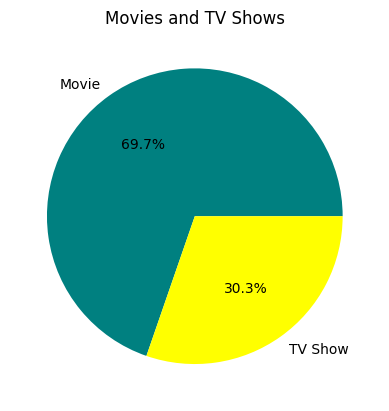

In [112]:
types = df1.type.value_counts()
plt.pie(types,  labels=types.index, autopct='%1.1f%%' , colors = ['teal' , 'yellow'])
plt.title('Movies and TV Shows')
plt.show()

### **Distribution of Contents added in Netflix along time.**

In [143]:
d = df1.groupby(['year_added' ,'type' ])['show_id'].count().reset_index()
d.rename({'show_id' : 'total movies/TV shows'}, axis = 1 , inplace = True)

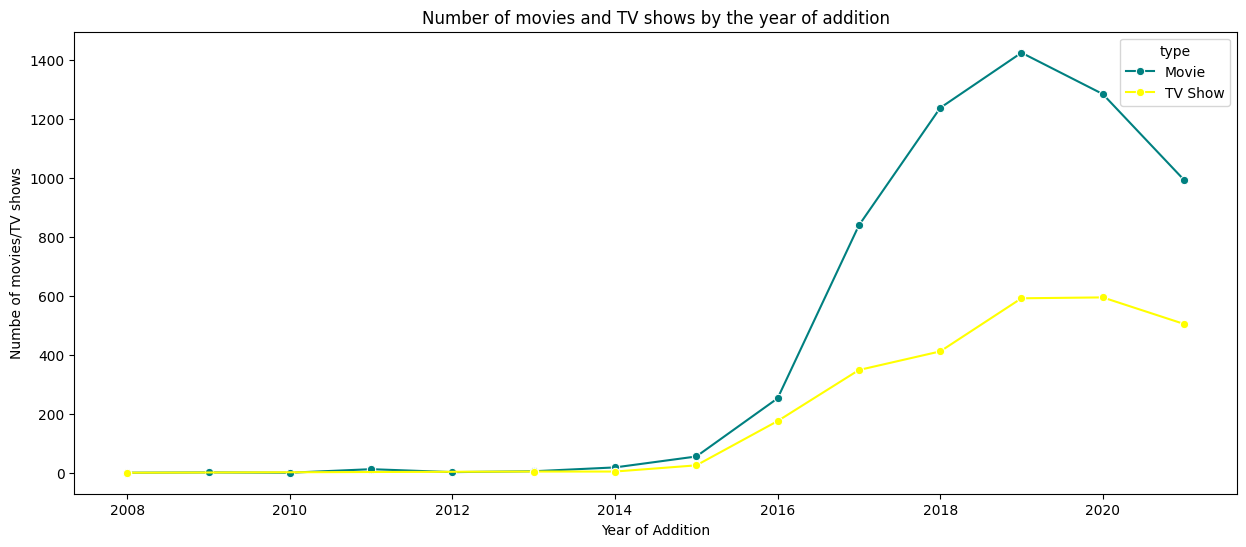

In [144]:
plt.figure(figsize = (15,6))
sns.lineplot(data = d , x = 'year_added' , y = 'total movies/TV shows' , hue = 'type', marker = 'o',ms =6,palette=['teal', 'yellow'])
plt.xlabel('Year of Addition' )
plt.ylabel('Numbe of movies/TV shows' )
plt.title('Number of movies and TV shows by the year of addition')
plt.show()

**Observation:**
* The trend of addition of Movies and Shows started to skyrocket from 2015 which peaked in 2019 with the highest number of movies and TV shows added on the Netflix.
* Year 2020 and 2021 has seen the drop in content added on Netflix, most probably due to Pandemic.  
* Despite the drop, TV shows content have not dropped as drastic as movies. Which is a result of people focusing on TV shows, rather than Movies in recent years.

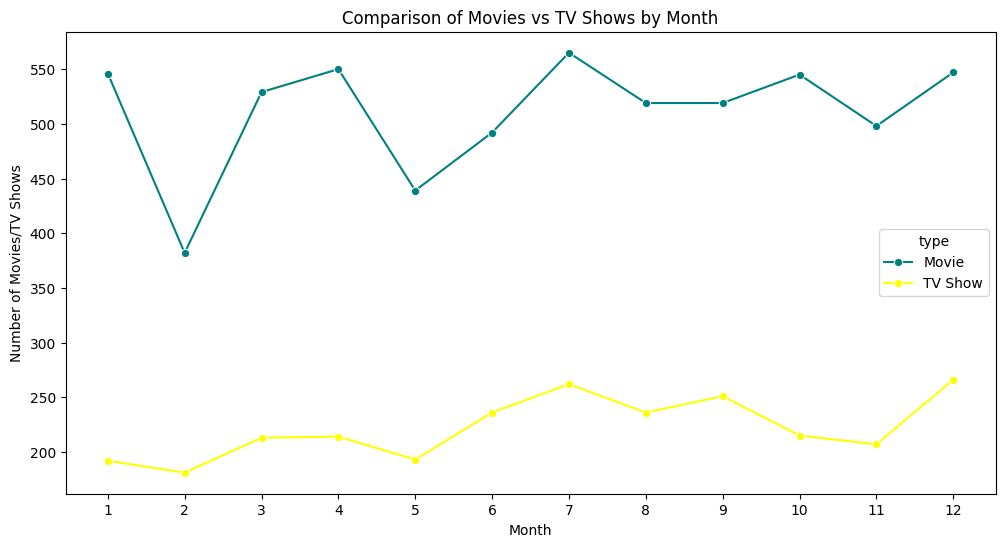

In [234]:
monthly_content = df1.groupby(['month_added', 'type'])['show_id'].count().reset_index()
monthly_content.rename(columns={'show_id': 'count'}, inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_content, x='month_added', y='count', hue='type', marker='o', palette=['teal', 'yellow'])
plt.xlabel('Month')
plt.ylabel('Number of Movies/TV Shows')
plt.title('Comparison of Movies vs TV Shows by Month')
plt.xticks(range(1, 13))
plt.show()


**Observation:**

Clearly the number of movies released per month is much greater that the number of TV Shows released.

### **Number of movies/shows released per year changed over years(Total and after 2000)**

In [127]:
nd = df1.groupby(['type' , 'release_year'])['show_id'].count().reset_index()
nd.rename({'show_id' : 'total movies/TV shows'}, axis = 1 , inplace = True)

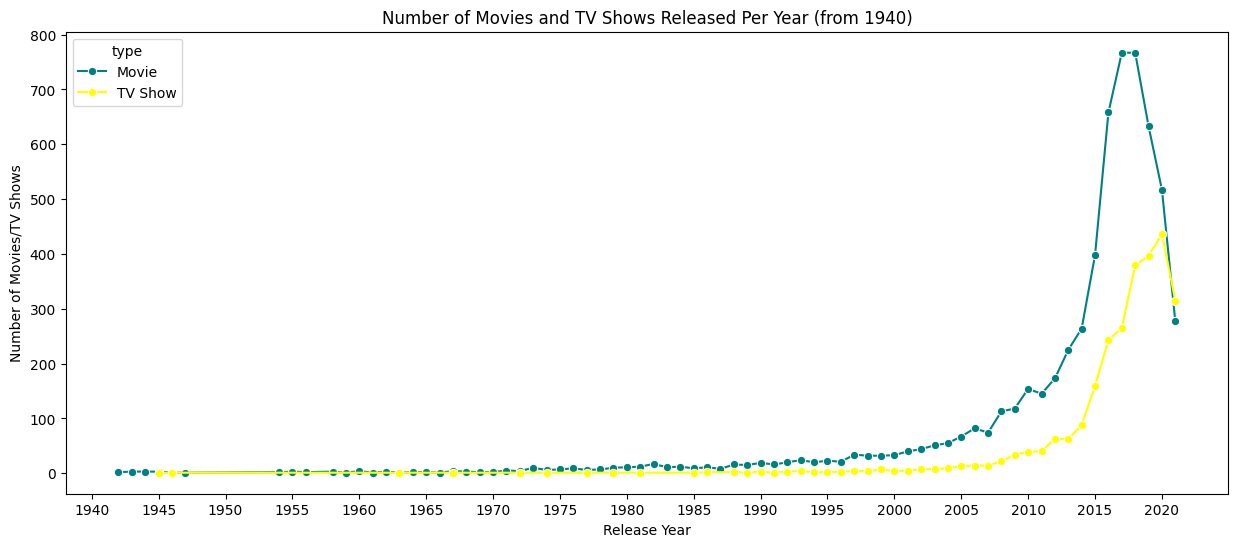

In [141]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=nd[nd['release_year']>1940], x='release_year', y='total movies/TV shows', hue='type', marker='o', ms=6,palette=['teal', 'yellow'])
plt.xlabel('Release Year')
plt.ylabel('Number of Movies/TV Shows')
plt.title('Number of Movies and TV Shows Released Per Year (from 1940)')
plt.xticks(np.arange(1940 , 2021 , 5))
plt.show()

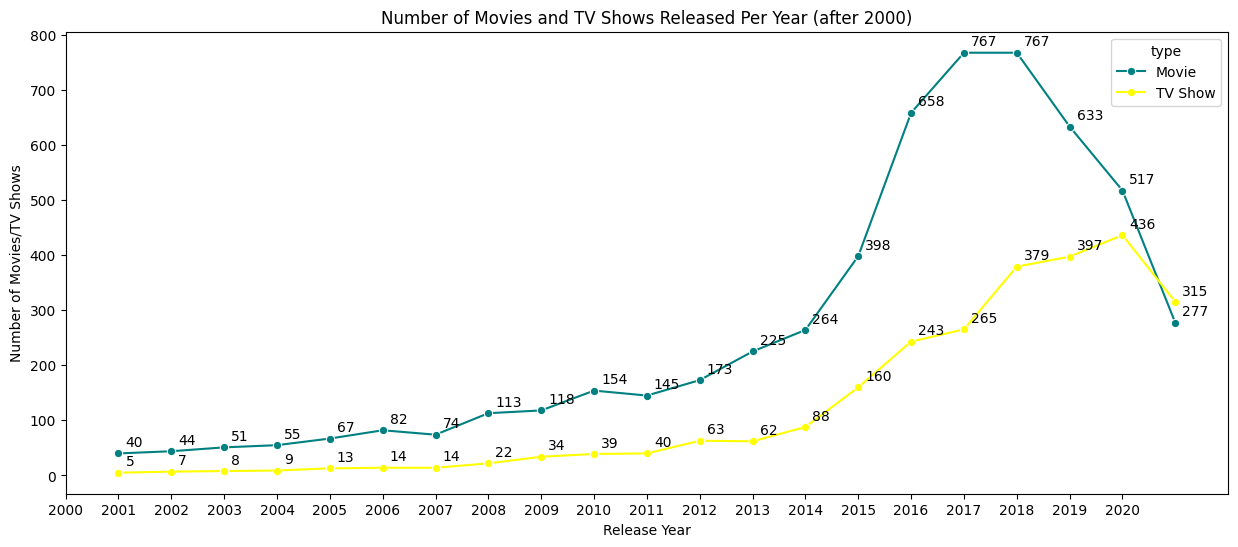

In [140]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=nd[nd['release_year']>2000], x='release_year', y='total movies/TV shows', hue='type', marker='o', ms=6, palette=['teal', 'yellow'])
plt.xlabel('Release Year')
plt.ylabel('Number of Movies/TV Shows')
plt.title('Number of Movies and TV Shows Released Per Year (after 2000)')
plt.xticks(np.arange(2000 , 2021 , 1))

for x, y, type_val in zip(nd[nd['release_year'] > 2000]['release_year'], nd[nd['release_year'] > 2000]['total movies/TV shows'], nd[nd['release_year'] > 2000]['type']):
    plt.annotate(str(y), xy=(x, y), xytext=(5, 5), textcoords='offset points')

plt.show()


Observation:
* Tremendously grown in numbers after 2014 and 2018 marks the peak of number of movies and TV shows released.
* Since 2018, A drop in movies is seen and rise in TV shows is observed clearly, and TV shows surpasses the movies count in 2020's.
* In recent years TV shows are focussed more than Movies.

### **Total movies/TV shows by each director(top 10)**

In [145]:
top_10_dir = dir_df.director.value_counts().head(10).index
df_new = dir_df.loc[dir_df['director'].isin(top_10_dir)]

<ipython-input-153-57fa0c717139>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_new , y = 'director' , order = top_10_dir , orient = 'v',palette='rainbow')


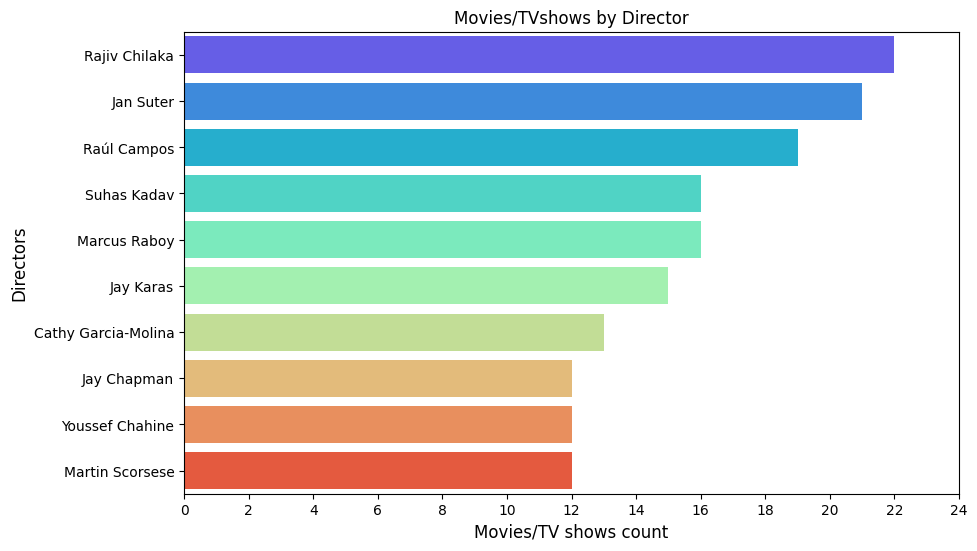

In [153]:
plt.figure(figsize= (10 , 6))
sns.countplot(data = df_new , y = 'director' , order = top_10_dir , orient = 'v',palette='rainbow')
plt.xlabel('total_movies/TV shows' , fontsize = 12)
plt.xlabel('Movies/TV shows count')
plt.ylabel('Directors' , fontsize = 12)
plt.title('Movies/TVshows by Director')
plt.xticks(np.arange(0 , 25 , 2))
plt.show()

**Observation:**

The top 3 directors on Netflix in terms of count of movies directed by them are - Rajiv Chilaka, Jan Suter, Raúl Campos

### **Top 10 actors by number of movies and Tv shows done.**


<ipython-input-161-380496a91738>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_new, y='cast', order=top_10_actors, orient='v', palette='rainbow')


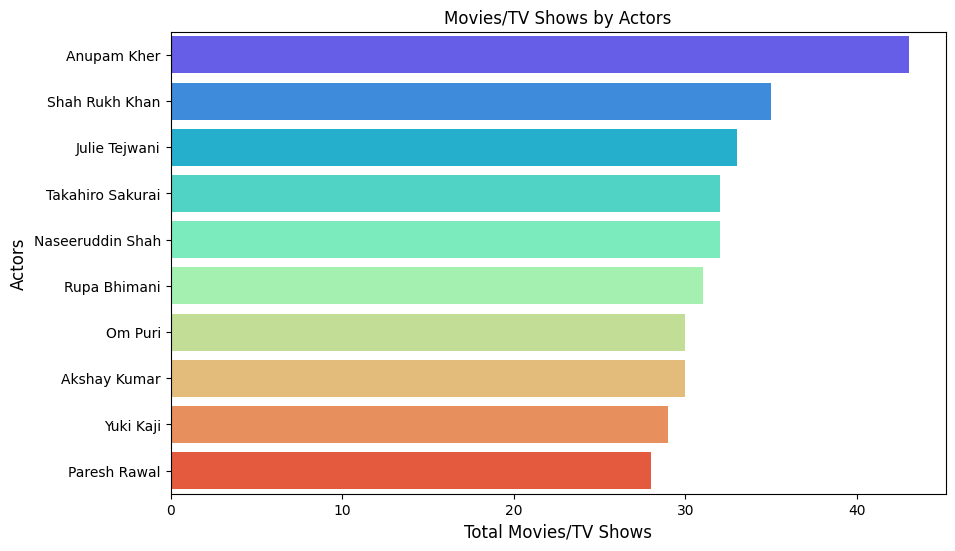

In [161]:
top_10_actors = cast_df.cast.value_counts().head(10).index
df_new = cast_df.loc[cast_df['cast'].isin(top_10_actors)]
plt.figure(figsize=(10, 6))
sns.countplot(data=df_new, y='cast', order=top_10_actors, orient='v', palette='rainbow')
plt.xlabel('Total Movies/TV Shows', fontsize=12)
plt.ylabel('Actors', fontsize=12)
plt.title('Movies/TV Shows by Actors')
plt.show()

# **Outliers Check**

### **Checking Outliers for number of movies directed by each director**

In [158]:
o = dir_df.director.value_counts()
o

,count
director,
Rajiv Chilaka,22
Jan Suter,21
Raúl Campos,19
Suhas Kadav,16
Marcus Raboy,16
...,...
Raymie Muzquiz,1
Stu Livingston,1
Joe Menendez,1


In [166]:
def calculate_outliers(data):

    q1 = np.percentile(data, 25)

    q3 = np.percentile(data, 75)

    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = [value for value in data if value < lower_bound or value > upper_bound]

    return outliers


def calculate_max_occurred_value(data):
    unique_values, value_counts = np.unique(data, return_counts=True)

    max_count_index = np.argmax(value_counts)

    max_occurred_value = unique_values[max_count_index]

    return max_occurred_value

In [168]:
outliers = calculate_outliers(o)
max_occurred_value = calculate_max_occurred_value(o)
set(outliers)

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 19, 21, 22}

In [169]:
max_occurred_value

1

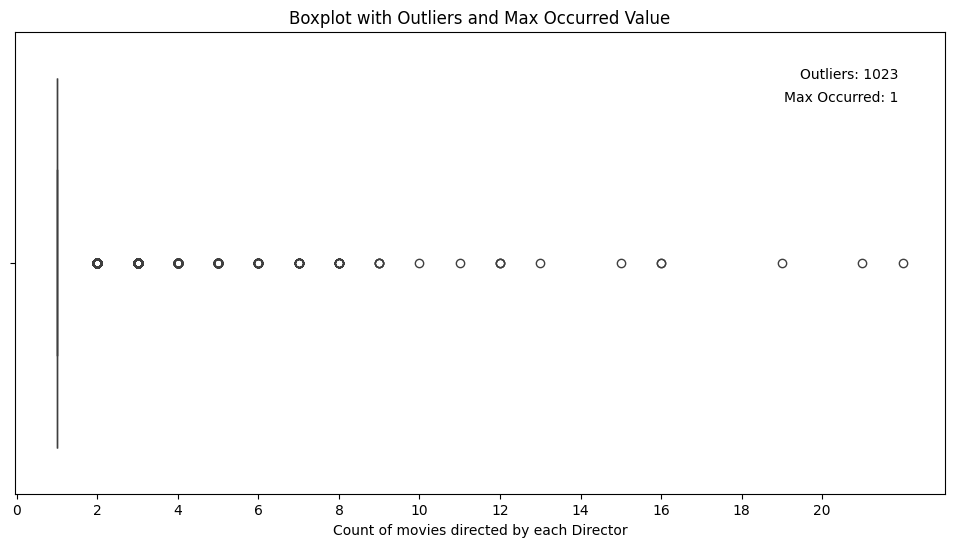

In [171]:
plt.figure(figsize = (12,6))
sns.boxplot(data=o, showfliers=True, whis=1.5 , orient = 'h')

outliers = calculate_outliers(o)
max_occurred_value = calculate_max_occurred_value(o)

plt.text(0.95, 0.9, f"Outliers: {len(outliers)}", transform=plt.gca().transAxes, ha='right')
plt.text(0.95, 0.85, f"Max Occurred: {max_occurred_value}", transform=plt.gca().transAxes, ha='right')


plt.xlabel("Count of movies directed by each Director")
plt.xticks(np.arange(0,22,2))
plt.title("Boxplot with Outliers and Max Occurred Value")

plt.show()

**Observation:**

The maximum occured value is 1, which means maximum directors on the Netflix have directed 1 movie/Tv show. There are few directors who have directed more than 1 movies/tv shows and they are outliers.

### **Total movies/TV shows by each country**

In [172]:
top_10_country = cntry_df.country.value_counts().head(10).index
df2_country = cntry_df.loc[cntry_df['country'].isin(top_10_country)]

In [173]:
x = df2_country.groupby(['country' , 'type'])['show_id'].count().reset_index()
x.pivot(index = 'country' , columns = 'type' , values = 'show_id').sort_values('Movie',ascending = False)

type,Movie,TV Show
country,,
United States,2752,932
India,962,84
United Kingdom,534,271
Canada,319,126
France,303,90
Germany,182,44
Spain,171,61
Japan,119,198
Mexico,111,58


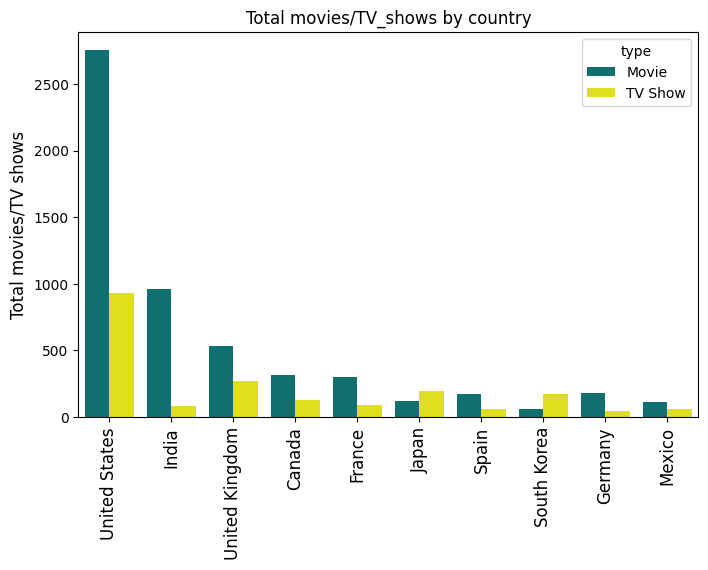

In [175]:
plt.figure(figsize= (8,5))
sns.countplot(data = df2_country , x = 'country' , order = top_10_country , hue = 'type',palette=['Teal','yellow'])
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('Total movies/TV shows' , fontsize = 12)
plt.xlabel('')
plt.title('Total movies/TV_shows by country')
plt.show()

In [176]:
top_10_country = cntry_df.country.value_counts().head(10).index
cntry_df['cat'] = cntry_df['country'].apply(lambda x : x if x in top_10_country else 'Other Countries' )

<ipython-input-176-f2fc36a8be10>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cntry_df['cat'] = cntry_df['country'].apply(lambda x : x if x in top_10_country else 'Other Countries' )


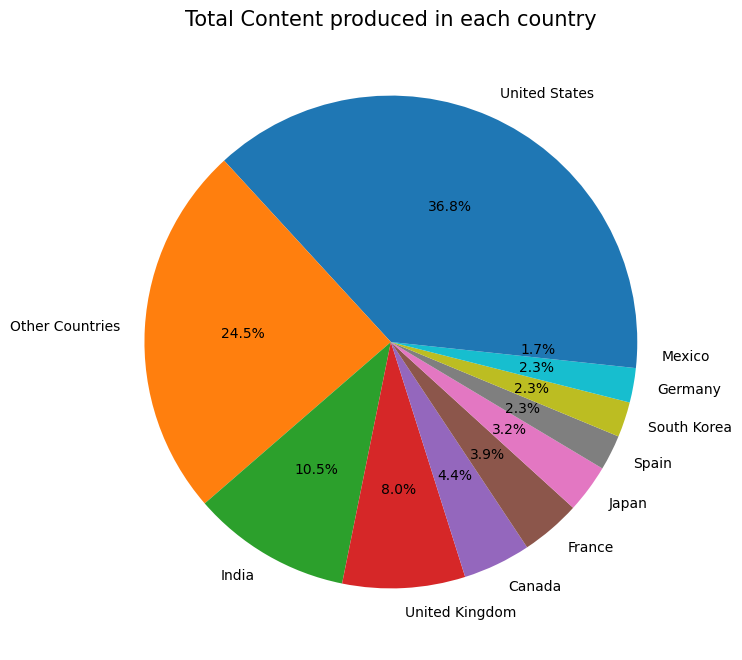

In [177]:
x = cntry_df.cat.value_counts()

plt.figure(figsize = (8,8))
plt.pie(x , labels = x.index, autopct='%1.1f%%')
plt.title('Total Content produced in each country' , fontsize = 15)
plt.show()

**Observation:**


* United States is the HIGHEST contributor country on Netflix, followed by India and United Kingdom.
* Maximum content of Netflix which is around 75% , is coming from these top 10 countries. Rest of the world only contributes 25% of the content.

### **Total content distribution by release year of the content.**

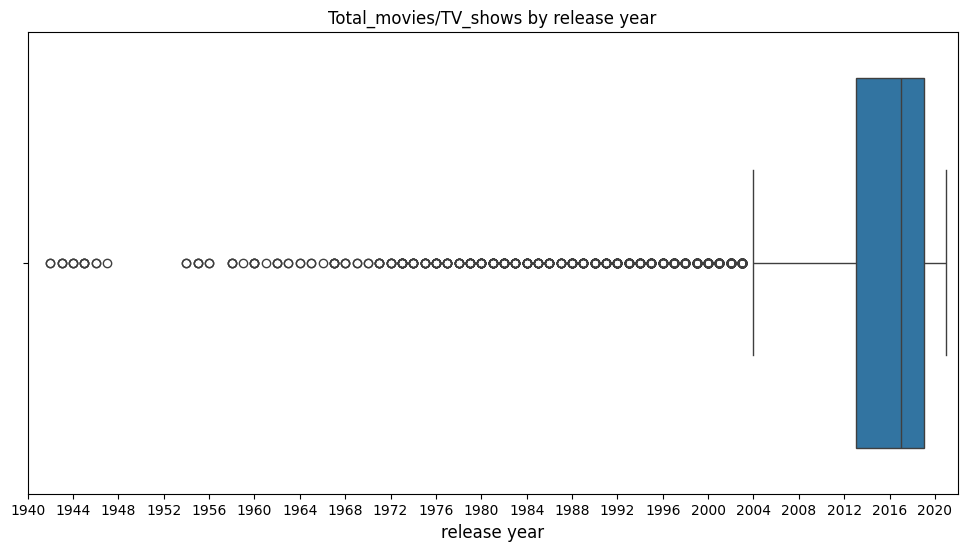

In [182]:
plt.figure(figsize= (12,6))
sns.boxplot(data = df1 , x = 'release_year')
plt.xlabel('release year' , fontsize = 12)
plt.title('Total_movies/TV_shows by release year')
plt.xticks(np.arange(1940 , 2021 , 4))
plt.xlim((1940 , 2022))
plt.show()

**Observations:**

* Netflix have major content which is released in the year range 2004-2021
* It seems that the content older than year 2000 is almost missing from the Netflix.


### **Total movies/TV shows distribution by rating of the content**

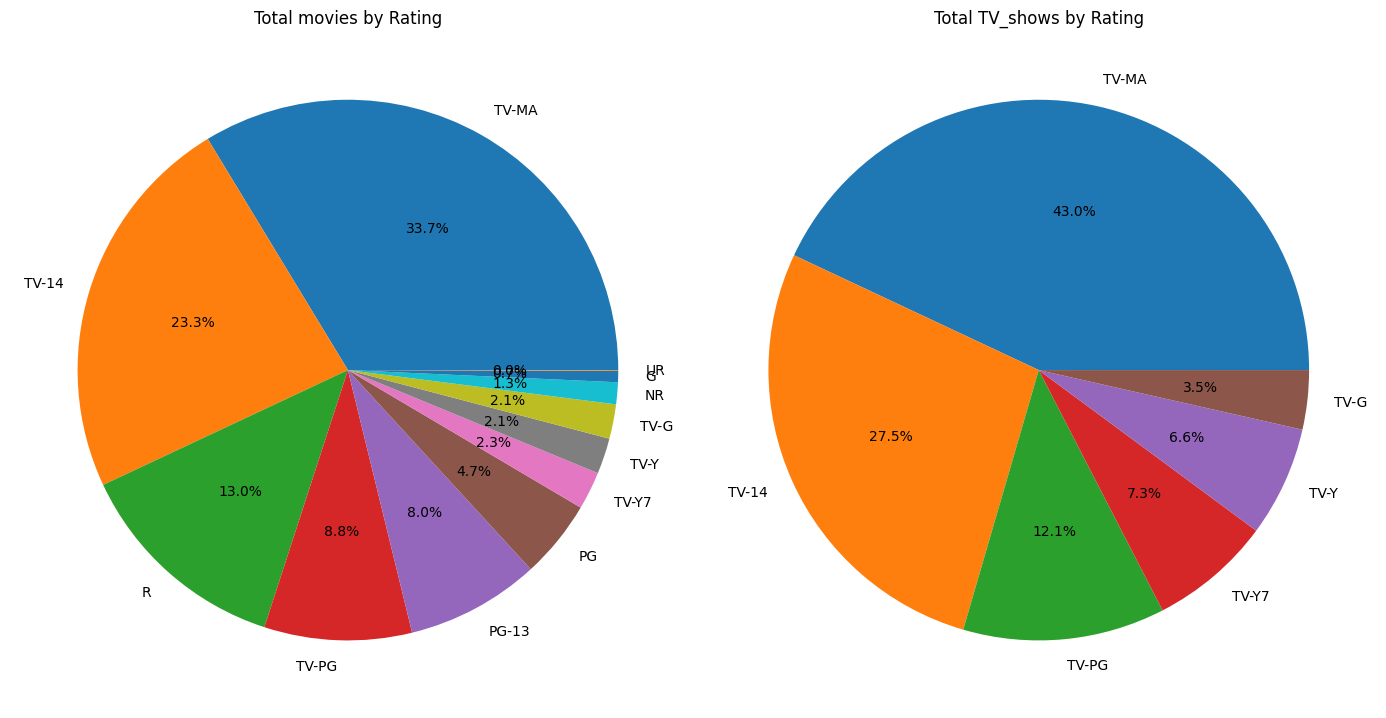

In [184]:
m = movies.loc[~movies.rating.isin(['Not Available' , 'NC-17' , 'TV-Y7-FV'])]
m = m.rating.value_counts()
t = tv_shows.loc[~tv_shows.rating.isin(['Not Available' , 'R' , 'NR', 'TV-Y7-FV'])]
t = t.rating.value_counts()


fig, ax = plt.subplots(1,2, figsize=(14,8))
ax[0].pie(m , labels = m.index, autopct='%1.1f%%')
ax[0].set_title('Total movies by Rating')

ax[1].pie(t , labels = t.index, autopct='%1.1f%%')
ax[1].set_title('Total TV_shows by Rating')

plt.tight_layout()
plt.show()

**Observations:**

Most number of movies and TV shows are rated TV-MA (for mature audiences), followed by TV-14 & R/TV-PG

### **Total movies/TV shows distribution by duration of the content**

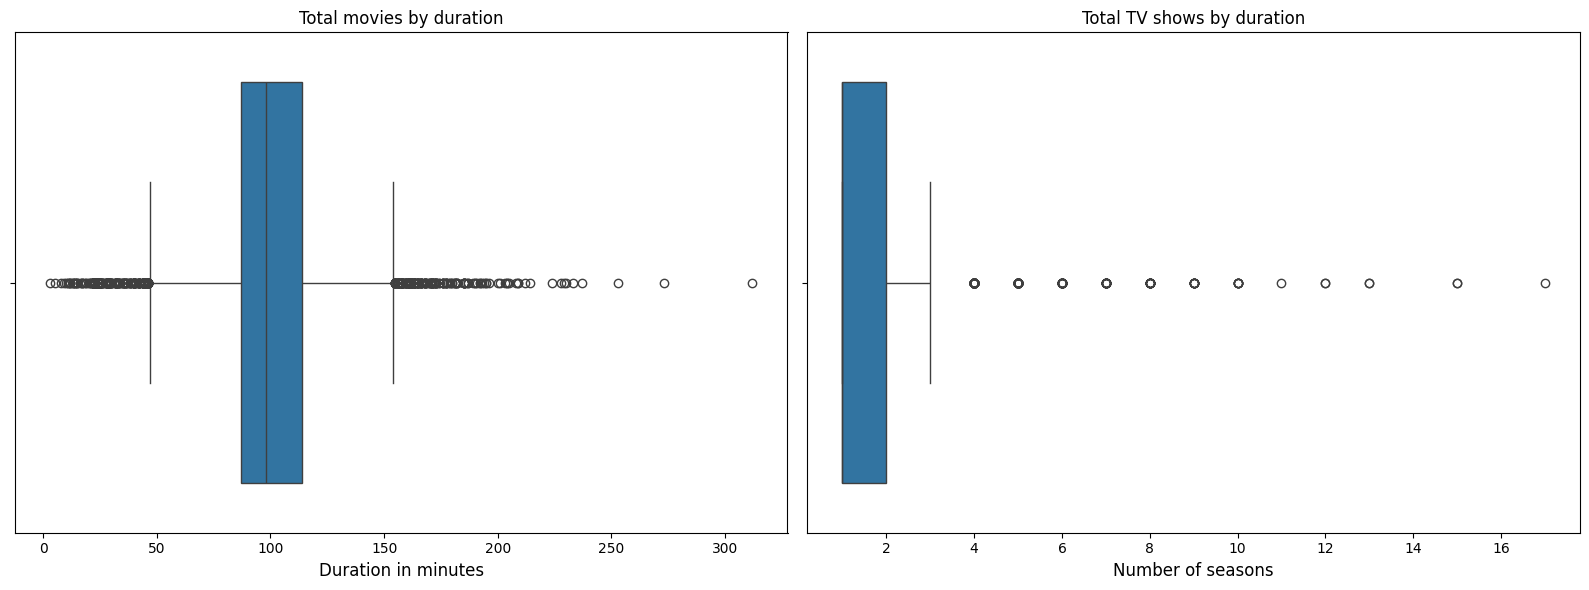

In [188]:
fig, ax = plt.subplots(1,2, figsize=(16,6))

sns.boxplot (data = movies , x = 'duration_in_minutes' ,ax =ax[0])
ax[0].set_xlabel('Duration in minutes' ,  fontsize = 12)
ax[0].set_title('Total movies by duration')

sns.boxplot (data = tv_shows , x = 'duration_in_seasons' , ax = ax[1])
ax[1].set_xlabel('Number of seasons' ,  fontsize = 12)
ax[1].set_title('Total TV shows by duration')

plt.tight_layout()
plt.show()

**Observations:**

Movie Duration: 50 mins - 150 mins is the range excluding potential outliers (values lying outside the whiskers of boxplot)


TV Show Duration: 1-3 seasons is the range for TV shows excluding potential outliers

### **Total movies/TV shows in each Genre**

<ipython-input-197-204613bc5f81>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_movie , x = 'listed_in' , order = top_10_movie_genres, palette="Dark2")


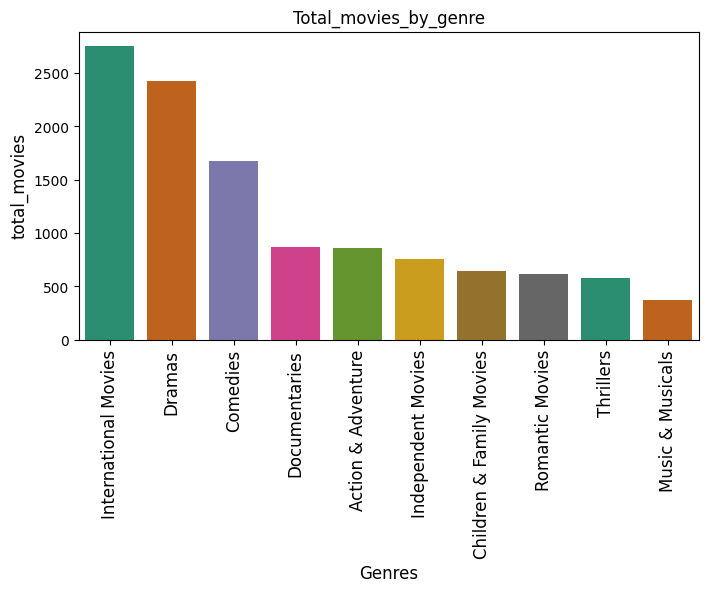

In [197]:
top_10_movie_genres = genre_df[genre_df['type'] == 'Movie'].listed_in.value_counts().head(10).index
df_movie = genre_df.loc[genre_df['listed_in'].isin(top_10_movie_genres)]

plt.figure(figsize= (8,4))
sns.countplot(data = df_movie , x = 'listed_in' , order = top_10_movie_genres, palette="Dark2")
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('total_movies' , fontsize = 12)
plt.xlabel('Genres' , fontsize = 12)
plt.title('Total_movies_by_genre')
plt.show()

<ipython-input-198-c5a2507477f6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_tv , x = 'listed_in' , order = top_10_TV_genres,palette="Dark2")


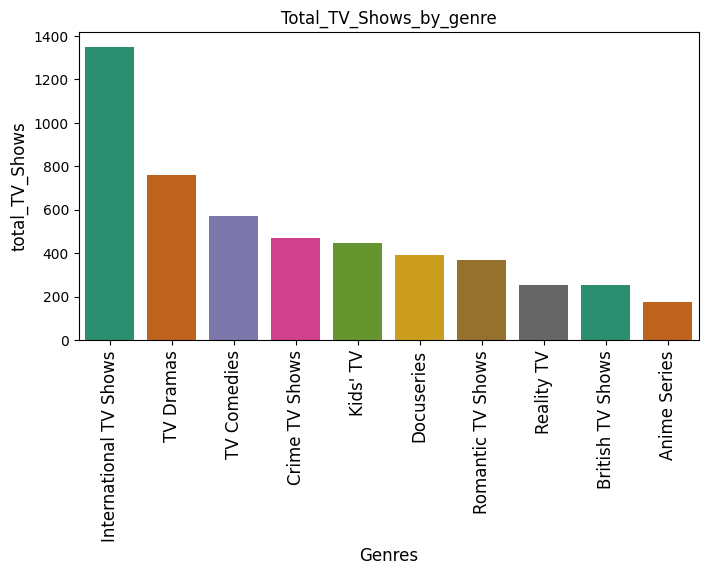

In [198]:
top_10_TV_genres = genre_df[genre_df['type'] == 'TV Show'].listed_in.value_counts().head(10).index
df_tv = genre_df.loc[genre_df['listed_in'].isin(top_10_TV_genres)]

plt.figure(figsize= (8,4))
sns.countplot(data = df_tv , x = 'listed_in' , order = top_10_TV_genres,palette="Dark2")
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('total_TV_Shows' , fontsize = 12)
plt.xlabel('Genres' , fontsize = 12)
plt.title('Total_TV_Shows_by_genre')
plt.show()

**Observation:**

International Movies and TV Shows , Dramas , and Comedies are the top 3 genres on Netflix for both Movies and TV shows.


## **Popular genres in top 20 countries**

In [199]:
top_20_country = cntry_df.country.value_counts().head(20).index
top_20_country = cntry_df.loc[cntry_df['country'].isin(top_20_country)]

In [200]:
x = top_20_country.merge(genre_df , on = 'show_id').drop_duplicates()
country_genre = x.groupby([ 'country' , 'listed_in'])['show_id'].count().sort_values(ascending = False).reset_index()
country_genre = country_genre.pivot(index = 'listed_in' , columns = 'country' , values = 'show_id')

Text(0.5, 1.0, 'Countries and Genres')

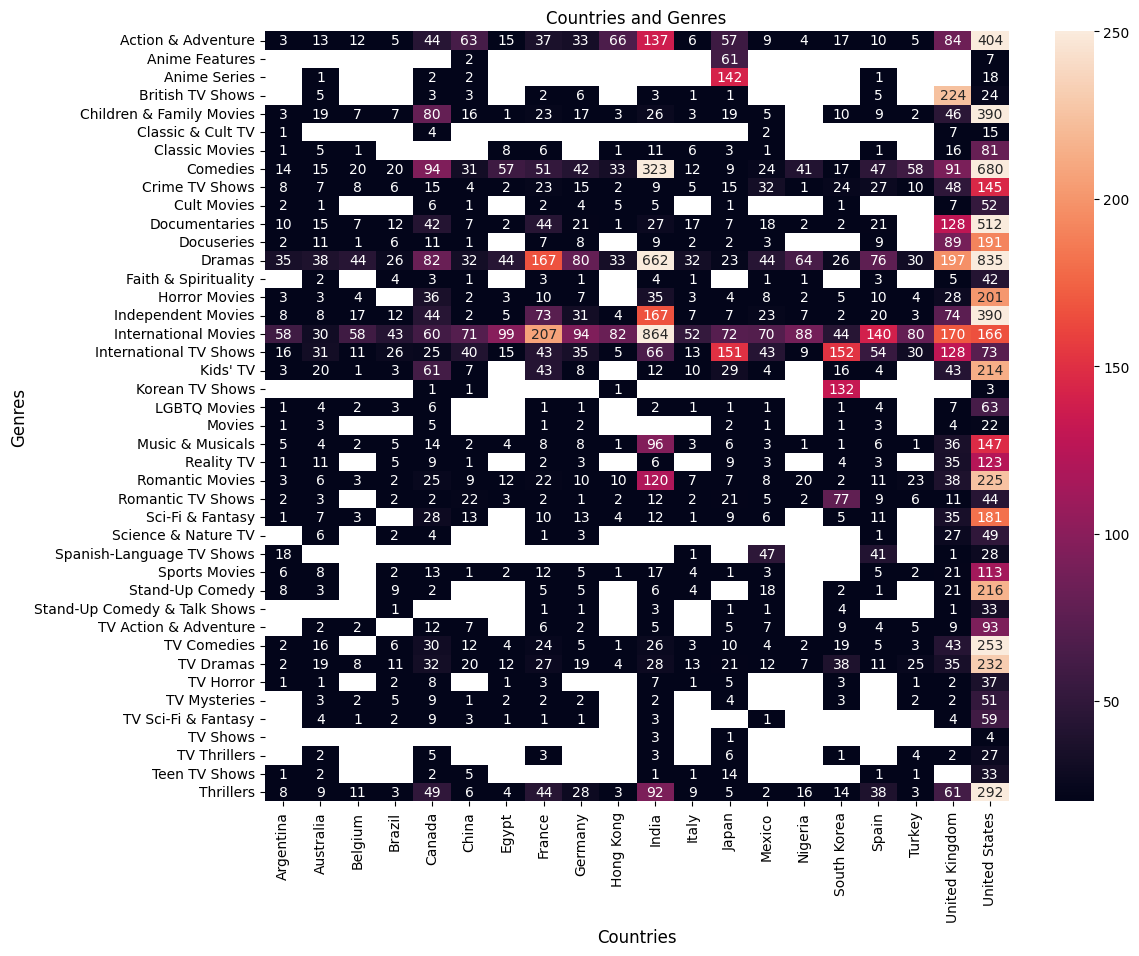

In [206]:
plt.figure(figsize = (12,10))
sns.heatmap(data = country_genre , annot = True , fmt=".0f" , vmin = 20 , vmax = 250 )
plt.xlabel('Countries' , fontsize = 12)
plt.ylabel('Genres' , fontsize = 12)
plt.title('Countries and Genres' , fontsize = 12)

**Observations:**

* Maximum International movies are produced in India.
* United States and UK have a good mix of almost all genres.
* Country-specific genres: Korean TV shows (Korea), British TV Shows (UK), Anime features and Anime series (Japan), Spanish TV Shows (Argentina, Mexico and Spain)
* Popular genres across countries: Action & Adventure, Children & Family Movies, Comedies, Dramas, International Movies & TV Shows, TV Dramas, Thrillers.

### **Country-wise Rating of Content**

In [203]:
x = top_20_country.merge(df1 , on = 'show_id').groupby(['country_x' , 'rating'])['show_id'].count().reset_index()
country_rating = x.pivot(index = ['country_x'] , columns = 'rating' , values = 'show_id')

Text(0.5, 1.0, 'Countries and Ratings')

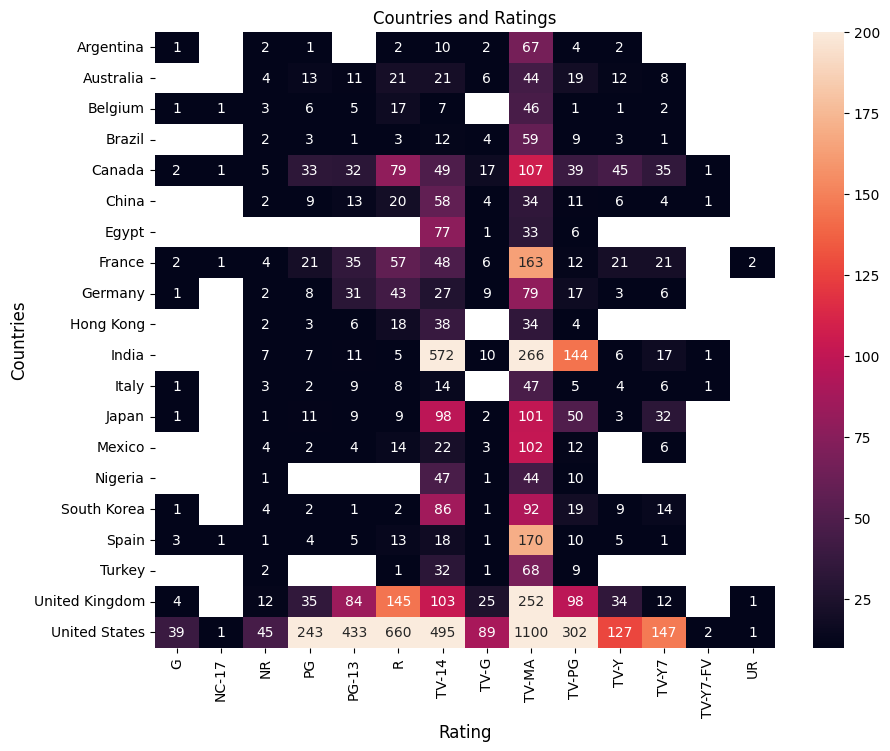

In [205]:
plt.figure(figsize = (10,8))
sns.heatmap(data = country_rating , annot = True , fmt=".0f"  , vmin = 10 , vmax=200)
plt.ylabel('Countries' , fontsize = 12)
plt.xlabel('Rating' , fontsize = 12)
plt.title('Countries and Ratings' , fontsize = 12)

**Observations:**

* India also has many titles rated TV-PG, other than TV-MA & TV-14.
* There is scarce content for general audience (TV-G & G) across all countries except US.
* Overall, Netflix has an large amount of adult content across all countries (TV-MA & TV-14).
* NC-17 and TV-Y7-FV is scarce across almost all countries.

## **The top actors by country**

In [207]:
x = cast_df.merge(cntry_df , on = 'show_id').drop_duplicates()
x = x.groupby(['country' , 'cast'])['show_id'].count().reset_index()
x.loc[x['country'].isin(['United States'])].sort_values('show_id' , ascending = False).head(5)

,country,cast,show_id
49405,United States,Tara Strong,22
48330,United States,Samuel L. Jackson,22
40463,United States,Fred Tatasciore,21
35733,United States,Adam Sandler,20
41672,United States,James Franco,19


In [210]:
country_list = ['India'  , 'United Kingdom' , 'Canada' , 'France' , 'Japan']
top_5_actors = x.loc[x['country'].isin(['United States'])].sort_values('show_id' , ascending = False).head(5)
for i in country_list:
    new = x.loc[x['country'].isin([i])].sort_values('show_id' , ascending = False).head(5)
    top_5_actors = pd.concat( [top_5_actors , new] , ignore_index = True)

In [211]:
top_5_actors

,country,cast,show_id
0,United States,Tara Strong,22
1,United States,Samuel L. Jackson,22
2,United States,Fred Tatasciore,21
3,United States,Adam Sandler,20
4,United States,James Franco,19
5,India,Anupam Kher,40
6,India,Shah Rukh Khan,34
7,India,Naseeruddin Shah,31
8,India,Om Puri,29
9,India,Akshay Kumar,29


<Axes: xlabel='show_id', ylabel='cast'>

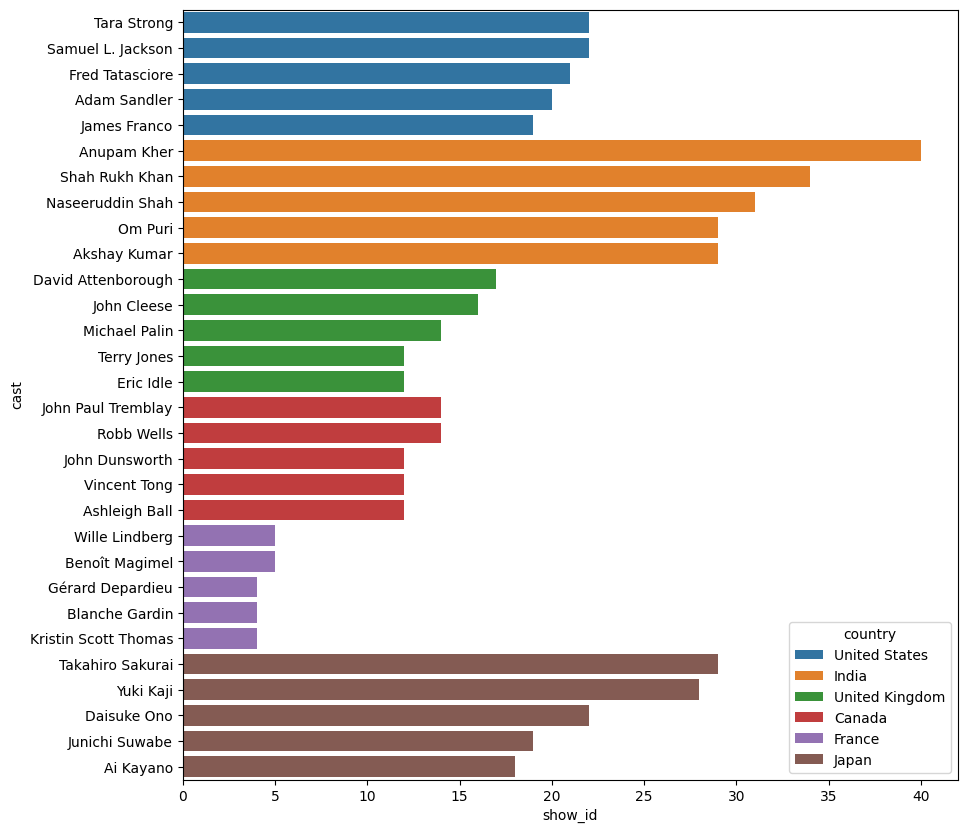

In [212]:
plt.figure(figsize = (10,10))
sns.barplot(data = top_5_actors , y = 'cast' , x = 'show_id' , hue = 'country')

## **Top 5 directors by Genre**

In [213]:
genre_list = [ 'Children & Family Movies', 'Comedies','Dramas', 'International Movies', 'Documentaries' ,
              'International TV Shows', 'Sci-Fi & Fantasy', 'Thrillers', 'Horror Movies']

x = dir_df.merge(genre_df , on = 'show_id').groupby([ 'listed_in' , 'director',])['show_id'].count().reset_index()

top_5_dir = x.loc[x['listed_in'] == 'Action & Adventure'].sort_values('show_id' , ascending = False).head()

for i in genre_list:
    new = x.loc[x['listed_in'] == i].sort_values('show_id' , ascending = False).head()
    top_5_dir = pd.concat([top_5_dir , new])

top_5_dir

,listed_in,director,show_id
147,Action & Adventure,Don Michael Paul,9
550,Action & Adventure,S.S. Rajamouli,7
651,Action & Adventure,Toshiya Shinohara,7
215,Action & Adventure,Hidenori Inoue,7
606,Action & Adventure,Steven Spielberg,5
1215,Children & Family Movies,Rajiv Chilaka,22
1303,Children & Family Movies,Suhas Kadav,16
1211,Children & Family Movies,Prakash Satam,7
1241,Children & Family Movies,Robert Rodriguez,7
1288,Children & Family Movies,Steve Ball,6


## **Top 5 genres in each country**

In [214]:
x = genre_df.merge(cntry_df , on = 'show_id').drop_duplicates()
x = x.groupby(['country' , 'listed_in'])['show_id'].count().reset_index()
x.loc[x['country'] == 'United States'].sort_values('show_id' , ascending = False).head(5)

country_list = ['India'  , 'United Kingdom' , 'Canada' , 'France' , 'Japan']
top_5_genre = x.loc[x['country'].isin(['United States'])].sort_values('show_id' , ascending = False).head(5)

for i in country_list:
    new = x.loc[x['country'] == i].sort_values('show_id' , ascending = False).head(5)
    top_5_genre = pd.concat( [top_5_genre , new] , ignore_index = True)

top_5_genre

,country,listed_in,show_id
0,United States,Dramas,835
1,United States,Comedies,680
2,United States,Documentaries,512
3,United States,Action & Adventure,404
4,United States,Independent Movies,390
5,India,International Movies,864
6,India,Dramas,662
7,India,Comedies,323
8,India,Independent Movies,167
9,India,Action & Adventure,137


## **Variation in duration of movies by Release year**

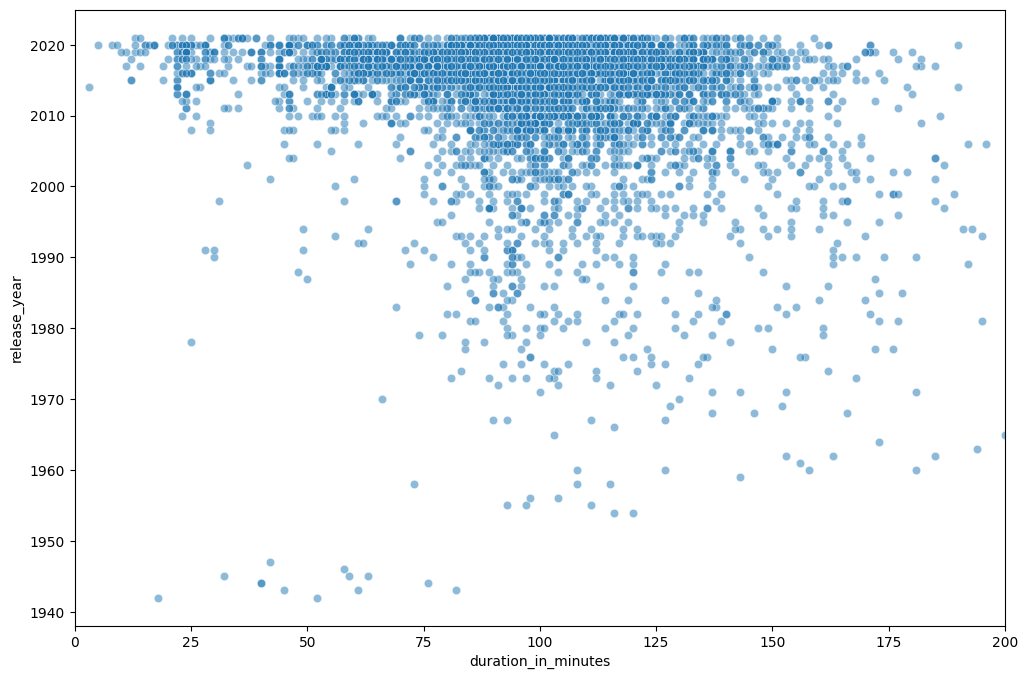

In [216]:
plt.figure(figsize = (12,8))
sns.scatterplot(data=movies, x='duration_in_minutes', y='release_year', alpha=0.5)
plt.xlim((0,200))
plt.show()

**Observation:**


The movies shorter than 150 minutes duration have increased drastically after 2000 while movies longer than 150 minutes are not much popular.
There is a huge surge in the number of shorter duration movies (less than 75 mins) post 2010. Overall, Short movies have been popular in last 10 years.

## **The best time of the year when maximum content get added on the Netflix**

Text(0.5, 1.0, 'Year and Month of Adding Shows on Netflix')

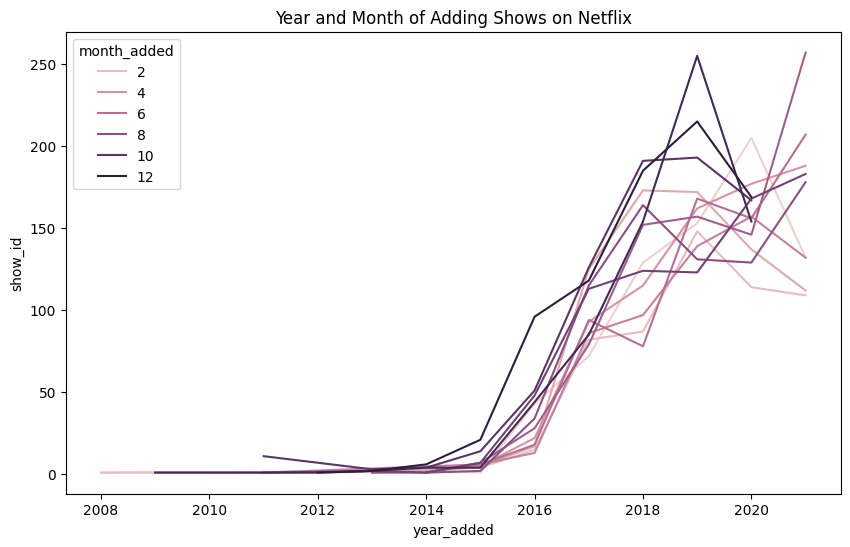

In [220]:
month_year = df1.groupby(['year_added' , 'month_added'])['show_id'].count().reset_index()

plt.figure(figsize = (10,6))
sns.lineplot(data=month_year, x = 'year_added', y = 'show_id', hue='month_added')
plt.title('Year and Month of Adding Shows on Netflix')

**Observations:**

* The number of shows getting added is increasing with each year until 2020.
* Also, months in the last quarter of the year (Oct-Dec) have more shows being added than the other months of the year. This could be because US has its festive season and holidays in Dec and India also has Diwali in Oct-Nov.

## **countries that are adding more number of content over the time.**

In [222]:
country_list = cntry_df.country.value_counts().head(12).index
top_12_country = cntry_df.loc[cntry_df['country'].isin(country_list)]
country_year = top_12_country.merge(df1 , on = 'show_id')[['show_id','country_x' ,'type_x' , 'year_added' ]]
country_year.columns = ['show_id', 'country', 'type', 'year_added']

In [223]:
country_year = country_year.groupby(['country' , 'year_added'])['show_id'].count().reset_index()

<Axes: xlabel='year_added', ylabel='show_id'>

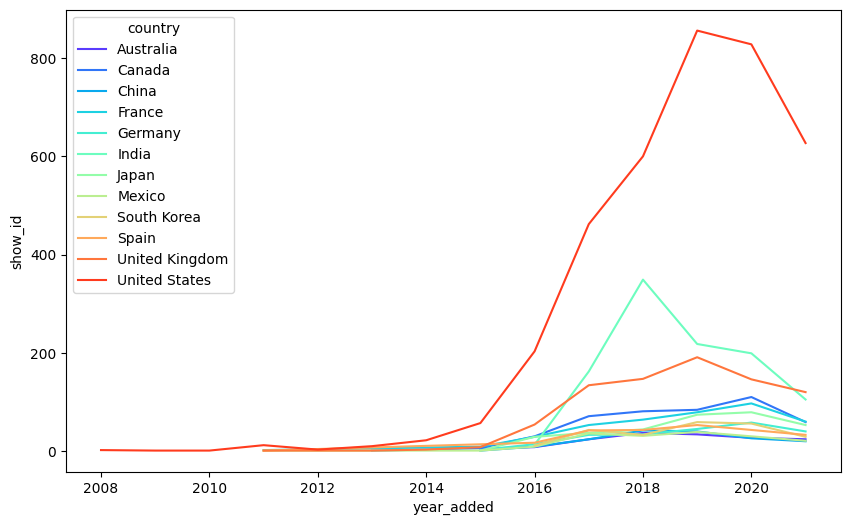

In [229]:
plt.figure(figsize = (10,6))
sns.lineplot(data = country_year , x = 'year_added' , y = 'show_id' , hue = 'country' , palette ='rainbow' )

**Observation:**

United Stated have always added highset number of movies/TV shows over the time. Since 2016, India has seen spike in popularity of content and added more number of content, followed by United Kingdom at 3rd position.

In [231]:
country_list = cntry_df.country.value_counts().head(12).index
top_12_country = cntry_df.loc[cntry_df['country'].isin(country_list)]
country_year = top_12_country.merge(df1 , on = 'show_id')[['show_id','country_x' ,'type_x' , 'year_added' ]]
country_year.columns = ['show_id', 'country', 'type', 'year_added']

movie_type = country_year.loc[country_year.type == 'Movie'].groupby(['country' , 'year_added'])['show_id'].count().reset_index()
tv_type = country_year.loc[country_year.type == 'TV Show'].groupby(['country' , 'year_added'])['show_id'].count().reset_index()

<Axes: xlabel='year_added', ylabel='show_id'>

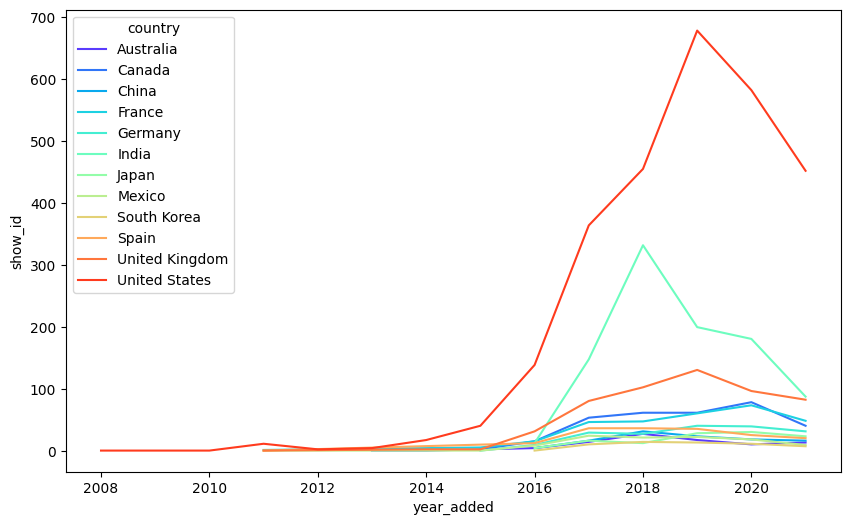

In [232]:
plt.figure(figsize = (10,6))
sns.lineplot(data = movie_type , x = 'year_added' , y = 'show_id' , hue = 'country' , palette ='rainbow' )

<Axes: xlabel='year_added', ylabel='show_id'>

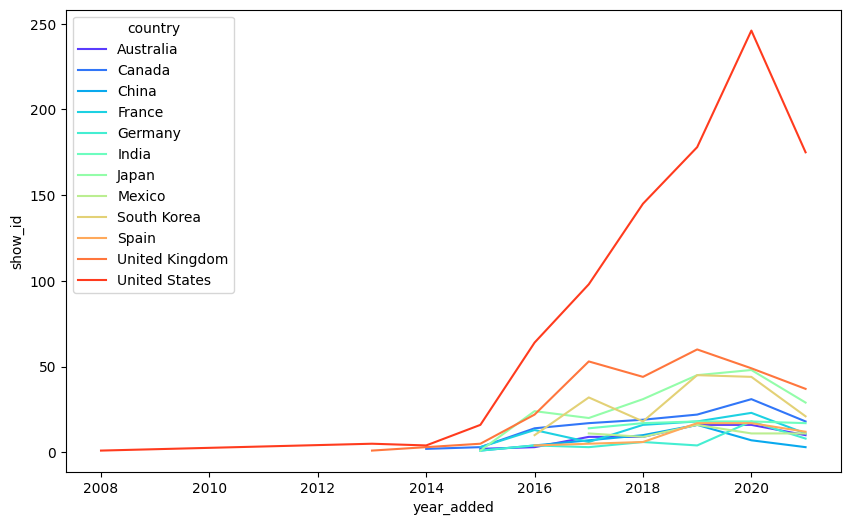

In [233]:
plt.figure(figsize = (10,6))
sns.lineplot(data = tv_type , x = 'year_added' , y = 'show_id' , hue = 'country' , palette ='rainbow' )

**Observation:**

 It is observed that United States tops in both movies and TV Shows. India is at 2nd positon in movies but In TV shows United Kingdom is at 2nd position, followed by India ,South Korea , Australia.

 It shows in countries like United Kingdom , South Korea , Australia TV Shows popularity is rising more than movies

# **Insights based on Non-Graphical and Visual Analysis**

* Around 70% content on Netflix is Movies and around 30% content is TV Shows.
* The movies and TV shows uploading on the Netflix started from the year 2008, It had very lesser content till 2014.
* Year 2015 marks the drastic growth in the content getting added to Netflix. It continues the uptrend since then and 2019 marks the highest number of movies and TV shows added on the Netflix. Year 2020 and 2021 has seen the drop in content added on Netflix, possibly because of Pandemic. But still , TV shows content have not dropped as drastic as movies.
* Since 2018, A drop in the movies is seen , but rise in TV shows is observed clearly. Being in continuous uptrend , TV shows surpassed the movies count in mid 2020. It shows the rise in popularity of tv shows in recent years.
* The number of movies released per month is much greater that the number of TV Shows released.




* Netflix has movies from variety of directors. Around **4993 directors** have their movies or tv shows on Netflix.
* Netflix has movies from total **122 countries**, United States being the highset contributor with almost 37% of all the content.
* The release year for shows is concentrated in the range 2005 - 2021.
50 mins - 150 mins is the range of movie durations, excluding potential outliers.
* 1-3 seasons is the range for TV shows seasons, excluding potential outliers.



* Most of the movies are from only three genres i.e. Dramas, International movies and comedy. And also the movies of these geners are released constantly throught the year.
* various ratings of content is avaialble on netfilx, for the various viewers categories like kids, adults , families. Highest number of movies and TV shows are rated TV-MA (for mature audiences).
* Content in most of the ratings is available in lesser quanitity except in US. Ratings like TV-Y7 , TV-Y7 FV , PG ,TV-G , G , TV-Y , TV-PG are very less avaialble in all countries except US.
* International Movies and TV Shows , Dramas , and Comedies are the top 3 genres on Netflix for both Movies and TV shows.
* Mostly country specific popular genres are observed in each country. Only United States have a good mix of almost all genres. Eg. Korean TV shows (Korea), British TV Shows (UK), Anime features and Anime series (Japan) and so on.


* Indian Actors have been acted in maximum movies on netflix. Top 5 actors are in India based on quantity of movies.
* Shorter duration movies have been popular in last 10 years.



# **Business Insights**

*  Netflix have majority of content which is released after the year 2000. It is observed that the content older than year 2000 is very scarce on Netflix. Senior Citizen could be the target audience for such content, which is almost missing currently.
*  Maximum content (more than 80%) is
  *  TV-MA - Content intended for mature audiences aged 17 and above.
  *  TV-14 - Content suitable for viewers aged 14 and above.
  *  TV-PG - Parental guidance suggested (similar ratings - PG-13 , PG)
  *  R - Restricted Content, that may not be suitable for viewers under age 17.
*  These ratings' movies target Matured and Adult audience. Rest 20 % of the content is for kids aged below 13. It shows that Netflix is currently serving mostly Mature audiences or Children with parental guidance.

*  Most popular genres on Netflix are International Movies and TV Shows , Dramas , Comedies, Action & Adventure, Children & Family Movies, Thrillers.
*  Maximum content of Netflix which is around 75% , is coming from the top 10 countries. Rest of the world only contributes 25% of the content. More countries can be focussed in future to grow the business.
*  Liking towards the shorter duration content is on the rise. (duration 75 to 150 minutes and seasons 1 to 3) This can be considered while production of new content on Netflix.
*  drop in content is seen across all the countries and type of content in year 2020 and 2021, possibly because of Pandemic.




# **Recommendations**



*  Very limited genres are focussed in most of the countries except US. It seems the current available genres suits best for US and few countries but maximum countries need some more genres which are highly popular in the region. eg. Indian Mythological content and soap opera is highly popular. We can create such more country specific genres and It might also be liked acorss the world just like Japanese Anime and Live actions.
*  While creating any content for some pirticular genre then, consider the most popular actors and directors for that content.

*  The movies produced should have the duration/run-time in the range of 75-150 minutes.
*  Country specific insights - The content need to be targetting the demographic of any country. Netflix can produce higher number of content in the perticular rating as per demographic of the country. Eg.
  *  The country like India , which is highly populous , has maximum content available only in three rating TV-MA, TV-14 , TV-PG. It is unlikely to serve below 14 age and above 35 year age group .
  *  Country Japan have only 3 rating of content largely served - TV-MA, TV-14 , TV-PG. Japan have high population of age above 60, and this can be served by increasing the content suitable for this age group.
*  Netflix is currently serving mostly Mature audiences or Children with parental guidance. It have scope to cater other audiences as well such as familymen , Senior citizen , kids of various age etc.
